## Given:  
model data of 34 species + ODE with 3 unknowns h_10_TPplus, h_10_TPminus, h_2

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

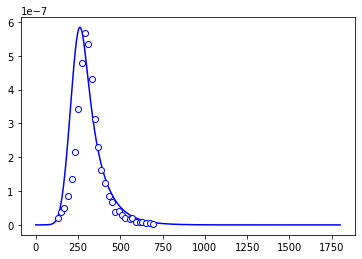

In [2]:
data = sio.loadmat("./data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_1 = np.loadtxt("./data/exp_data_case_3.dat").T
t_exp_1 = exp_data_1[0]
u_exp_1 = exp_data_1[1]

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
np.max(data["Y"], axis=0)

array([1.00000000e+00, 1.00000000e+00, 4.54258697e+00, 5.41050264e-01,
       1.29888545e-01, 1.00000000e+00, 1.00000000e-04, 8.99075842e+00,
       8.99157588e-04, 1.00000000e+00, 6.52850980e-04, 1.69286597e+01,
       2.63365081e+00, 1.00000000e+00, 1.19242711e-02, 1.35988619e+02,
       5.67362069e+01, 1.00000000e+00, 1.00010020e+00, 1.00000000e+00,
       1.00000000e-04, 9.98889639e-01, 9.96740400e-01, 7.49224388e-03,
       1.00000000e+00, 1.07688723e-04, 1.99890385e+00, 1.94999777e+00,
       1.96262243e+00, 1.00000000e+00, 1.00010002e+00, 1.00000000e+00,
       9.95287924e-01, 1.00000000e+00])

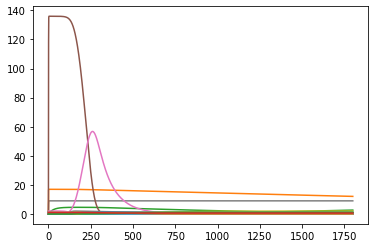

In [4]:
plt.plot(t_test * TIM, u_test)
plt.show()

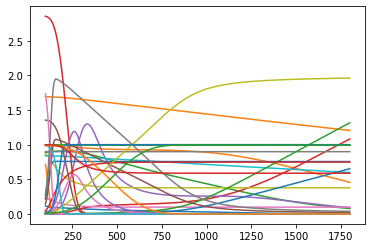

In [5]:
scale = np.array(
    [1, 1, 5, 0.5, 0.1, 1, 0.0000002, 10, 0.001, 0.005, \
     0.001, 10, 2, 0.01, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale

plt.plot(t_test[100:] * TIM, u_test[100:, :])
plt.show()

In [6]:
np.max(u_test[200:, :], axis=0)

array([8.75883084e-02, 9.91105323e-01, 9.08292047e-01, 1.08210053e+00,
       1.29888545e+00, 1.02684171e-03, 1.42825118e-01, 8.99075838e-01,
       5.50173769e-01, 8.33198516e-01, 6.52850980e-01, 1.68057769e+00,
       1.31682541e+00, 1.87905048e+00, 1.19242711e+00, 8.91785827e-01,
       5.67362069e-01, 1.66307787e-19, 1.00010000e+00, 1.10565860e-10,
       7.58821500e-01, 1.44967602e-06, 9.95009158e-01, 7.49224388e-01,
       1.13102402e-12, 1.04211453e+00, 2.04775731e-08, 1.88703118e+00,
       1.96262243e+00, 4.09845275e-02, 1.00010002e+00, 9.64315408e-01,
       9.95287924e-01, 9.50291844e-01])

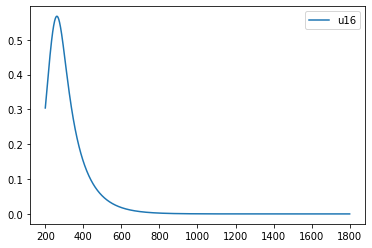

In [7]:
start = 200
# plt.plot(t_test[start:] * TIM, u_test[start:, 4], label='u4')
# plt.plot(t_test[start:] * TIM, u_test[start:, 6], label='u6')
# plt.plot(t_test[start:] * TIM, u_test[start:, 9], label='u9')
# plt.plot(t_test[start:] * TIM, u_test[start:, 10], label='u10')
# plt.plot(t_test[start:] * TIM, u_test[start:, 12], label='u12')
# plt.plot(t_test[start:] * TIM, u_test[start:, 13], label='u13')
# plt.plot(t_test[start:] * TIM, u_test[start:, 14], label='u14')
plt.plot(t_test[start:] * TIM, u_test[start:, 16], label='u16')
# plt.plot(t_test[start:] * TIM, u_test[start:, 18], label='u18')
# plt.plot(t_test[start:] * TIM, u_test[start:, 31], label='u31')
# plt.plot(t_test[start:] * TIM, u_test[start:, 32], label='u32')
# plt.plot(t_test[start:] * TIM, u_test[start:, 33], label='u33')
plt.legend()
plt.show()

In [8]:
t_train = t_test[200:][::20] # discard first 200 fluctuant points
u_train = u_test[200:][::20]
f_train = np.zeros_like(u_train)

model = models.PINN(TIM, NDM, scale, eps=1e-6)

In [38]:
loss = model.train(t_train, f_train, t_train, u_train, eps=1e-7, niter=1000000)
# print total loss, data loss, ode loss, eq10_loss, eq14_loss, eq31_loss, eq32_loss, eq33_loss

0 5.230983e-07 5.164747e-07 0.0662364 5600.9683 621.51373 0.0019048719 0.002005517 0.00010118914
1000 5.374364e-07 5.2034807e-07 0.17088312 14977.064 1757.9773 0.0016938507 0.0017386243 0.000100225705
2000 5.740547e-07 5.5030813e-07 0.23746547 6705.648 16636.627 0.0019432148 0.0019990443 0.000100472986
3000 8.9359514e-07 7.782977e-07 1.1529741 13631.497 101320.25 0.0016532211 0.001702216 0.00010121715
4000 7.237288e-07 7.1350553e-07 0.1022328 8123.1846 1306.8998 0.003961122 0.0038703396 0.000100501136
5000 5.596319e-07 5.3812255e-07 0.21509379 9512.186 2104.1428 0.049484864 0.049216878 0.00022877542
6000 5.349693e-07 5.2114177e-07 0.13827501 8226.3125 1779.5648 0.019118585 0.018983228 0.00011443265
7000 5.2360673e-07 5.1431283e-07 0.09293902 7082.677 1366.8959 0.0041775294 0.004154958 0.00011080805
8000 8.185458e-06 6.5860395e-06 15.994185 1580374.4 11995.212 0.035424925 0.034954507 0.00011057463
9000 2.283294e-06 2.191651e-06 0.91642934 87119.39 807.6447 0.018630397 0.018419795 0.0001

82000 4.84105e-07 4.809598e-07 0.031451967 2063.1943 376.51382 0.0033975376 0.0035738742 8.347192e-05
83000 4.7564447e-07 4.7325733e-07 0.023871437 1792.5286 375.33215 0.00095809635 0.0011514631 8.327177e-05
84000 4.7180535e-07 4.694935e-07 0.023118641 1673.13 430.70114 0.0009070334 0.0010861687 8.712927e-05
85000 1.2026324e-05 1.1864986e-05 1.6133779 47761.508 108165.234 0.027034942 0.026977235 9.840378e-05
86000 1.2042123e-06 1.1249397e-06 0.79272616 26805.725 51685.188 0.0037122716 0.0040141335 9.073253e-05
87000 4.957167e-07 4.869315e-07 0.08785131 7787.8433 664.38525 0.0015342984 0.0016997184 9.501159e-05
88000 1.941968e-05 1.88716e-05 5.4808035 48872.992 490398.06 0.043624815 0.044361554 0.00010655759
89000 5.459669e-07 5.210498e-07 0.24917105 16631.268 1889.6509 0.031974766 0.031860247 0.00012686594
90000 4.9169125e-07 4.840939e-07 0.07597329 4473.923 1216.7148 0.00939845 0.009573023 9.54327e-05
91000 4.768787e-07 4.7285963e-07 0.040190756 2781.7073 819.9452 0.001932018 0.002152

163000 2.2962793e-05 1.0325937e-05 126.36855 12458061.0 141217.67 0.18752004 0.18816015 8.6920045e-05
164000 4.5482966e-07 4.5279847e-07 0.02031182 1424.9915 215.83693 0.0017882983 0.002037513 7.772359e-05
165000 7.9130047e-07 7.655729e-07 0.2572754 23489.838 1554.5016 0.003242861 0.0035096386 7.949498e-05
166000 4.511914e-07 4.494626e-07 0.017288158 1128.4264 254.90726 0.0015632802 0.0018122982 7.9244266e-05
167000 5.399378e-07 5.360636e-07 0.03874156 1588.291 1888.6556 0.0018217539 0.0020704234 7.99161e-05
168000 4.911583e-07 4.80871e-07 0.10287274 3992.9421 2518.4124 0.01872824 0.01892966 0.00010129199
169000 1.5807717e-06 1.4291427e-06 1.5162903 29047.805 121543.81 0.0049925386 0.0053015277 8.0054786e-05
170000 6.109194e-07 5.359645e-07 0.7495492 65754.06 8802.938 0.0018079546 0.002091532 7.9742975e-05
171000 3.0429385e-06 2.5498389e-06 4.930996 354220.78 137176.58 0.008308766 0.008628146 8.5703214e-05
172000 1.0355648e-06 9.3155194e-07 1.0401279 65427.773 37574.637 0.004885334 0.0

In [9]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

In [10]:
# plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] * scale[14] + u_pred[:, 16] * NDM[16] * scale[16]) * 1e-9, '--', label='Model(No Inh)')
# plt.plot(t_train * TIM, (u_train[:, 14] * NDM[14] * scale[14] + u_train[:, 16] * NDM[16] * scale[16]) * 1e-9, label='Model(No Inh)')
# plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
# plt.show()

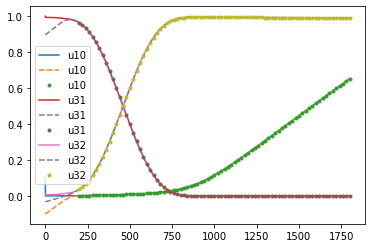

In [11]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_pred[:, 10], '--', label='u10')
plt.plot(t_train * TIM, u_train[:, 10], '.', label='u10')
# plt.plot(t_test * TIM, u_test[:, 18], label='u18')
# plt.plot(t_test * TIM, u_pred[:, 18], '--', label='u18')
# plt.plot(t_train * TIM, u_train[:, 18], '.', label='u18')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_pred[:, 31], '--', label='u31')
plt.plot(t_train * TIM, u_train[:, 31], '.', label='u31')
plt.plot(t_test * TIM, u_test[:, 32], label='u32')
plt.plot(t_test * TIM, u_pred[:, 32], '--', label='u32')
plt.plot(t_train * TIM, u_train[:, 32], '.', label='u32')
plt.legend()
plt.show()

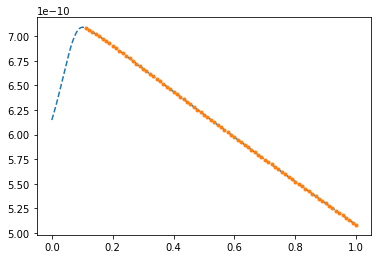

In [12]:
j = 9
plt.plot(t_test, u_pred[:, j] * NDM[j] * scale[j] * 1e-9, '--')
plt.plot(t_train, u_train[:, j] * NDM[j] * scale[j] * 1e-9, ".")
plt.show()

In [13]:
# plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * scale[16] * 1e-9, '--')
# plt.plot(t_train * TIM, u_train[:, 16] * NDM[16] * scale[16] * 1e-9)
# plt.show()

In [14]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
print("h_10_TPminus:",  tf.math.exp(model.log_h_10_TPminus).numpy())
print("h_2:", tf.math.exp(model.log_h_2).numpy())

h_10_TPplus: 4.363765
h_10_TPminus: 4.5439238e-06
h_2: 0.00017884806
